# SC42150 - Statistical Signal Processing
## Python Assignment II: Denoising with an FIR filter.


#### Team members
- Petar Velchev (4349253)
- Leon Kehler (4834186)
---


## Introduction

You have recently gotten involved in amateur RF communication, and you have finally managed to trasnmit a signal wirelessly! Your setup constists of one broadcasting and one receiving antenna. To test out the setup, you sent three short recordings of piano notes. Upon receiving them however, you realise that they have been corrupted by noise. So now you want to apply what you have learned in the Statistical Signal Processing course and try to remove the noise. Since the nature of the interference is stochastic, you want to subtract the effects of the distortion by using the theory of Wiener filters.

In the configuration of the figure below, all signals are discrete-time and real.
The corrupted signal $x(n) = d(n) + v(n)$ contains both the signal of interest $d(n)$ and a noise $v(n)$ which is _uncorrelated_ to $d(n)$.
In this assignment you will design a FIR filter $W(z)$, such that we can estimate the ground truth signal from $x(n)$ and from the statistical properties of the noise.

![alt text][denoising]

[denoising]: ./denoising-scheme.JPG

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

In your submission, please also include the provided `.mat` files. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

### Loading files

As mentioned before, you have three recordings available in the form of `notes_xxx.mat` files, one for each of the tests you ran. Furthermore, you have obtained a recording of the passive noise present in the system (`noise.mat`). Run this section in order to load the `.mat` files with the noise audios and the background noise signals.

In [1]:
# packages
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

import scipy.io as sio
import scipy.linalg as lin
import scipy.signal as sig


# use this function to play the signals
# be careful when using headphones!
def play_signal( signal ):
    sd.play( signal.astype('int16'), 22050 )

# notes to be played
notes = np.array( ['Do','Sol','La'] )

# number of experiments
N_exp = notes.shape[0]

print( f'Number of experiments = {N_exp}' )

# list of files for all experiments with audio
filenames = ['notes_do.mat', 'notes_sol.mat', 'notes_la.mat']

# Number of data points
N = len( sio.loadmat( filenames[0] )['audio'][0] )

# create array with received data
data_noised = np.zeros( (N_exp, N), dtype=float )
for iexp in range(N_exp):
    data_noised[iexp] = sio.loadmat( filenames[iexp] )['audio'][0]

# array for the time steps
time_steps = np.linspace( 0, N-1, N ).astype( int )
print( f'Number of recording time steps = {N}' )

# load background noise signal that was measured

filename_noise = 'noise.mat'
data_mat = sio.loadmat( filename_noise )['audio'][0]

Nnoise = len( data_mat )
noise_measured = np.array( data_mat, dtype=float )

print( f'Number of noise time steps = {Nnoise}' )

print(np.shape(noise_measured))
print(np.shape(N))

Number of experiments = 3
Number of recording time steps = 40305
Number of noise time steps = 40305
(40305,)
()


In [2]:
# listen the noised audio signals
ind_to_listen = 2
play_signal( data_noised[ind_to_listen] )

# Exercises
This part should be handled after all audio files were uploaded into *data_noised* array and the noise was uploaded into *noise_measured* file.

**1. (10 points)** Formulate the denoising problem as a Minimum Variance FIR Wiener Problem, using the symbols $x(n)$, $v(n)$, $d(n)$, $\hat{d}(n)$, $e(n)$ as in the figure presented in the **Introduction**.
No numerical values are required, but you need to specify the meaning of all the symbols and their relation to the sent and received data.


> 
The generic problem formulation as per the lecture notes shows that the Minimum Variance FIR Wiener Problem can be stated as: 
$$
\min _{w(i)} J(w(j)) \quad \text { for } J(w(j))=E\left[|e(n ; w(j))|^2\right]\tag{1}
$$
Where the difference equation relating the input $x(n)$ to the output $\hat{d}(n ; w(j))$ is as follows: 
$$
\hat{d}(n ; w(j))=\sum_{k=0}^{m-1} w(k) x(n-k)\tag{2}
$$
In our denoising case, the input $x(n)$ is the sum of the singal of interest $d(n)$ and additive noise signal $v(n)$, as per figure 1:
$$
x(n)=d(n)+v(n)\tag{3}
$$
Using the FIR Wiener filter on the input signal $x(n)$ produces the noise estimate $\hat{d}(n)$, which in turn can be subtracted from the measured signal of interest $d(n)$ to produce as output the error signal $e(n)$. Thus the denoising problem can be formulated according to the Minimum Variance FIR Wiener Problem of queation (1) and difference equation (2) as:
$$
\min _w(J(w))=E\left[|\left. e(n)\right|^2\right]=E\left[\left|d(n)-\hat{d}(n)\right|^2\right]\tag{4}
$$
$$
\hat{d}(n)=w(0) x(0)+w(1) x(n-1)+\ldots+w(m-1) x(n-m+1)=\sum_{k=0}^{m-1} w(k) x(n-k)\tag{5}
$$
With the following vector quantities as per equstion 9.5 of the lecture notes: 
$$
\mathbf{x}^*(\mathbf{n})=\left[\begin{array}{c}
x^*(n) \\
\vdots \\
x^*(n-m+1)
\end{array}\right] \quad \mathbf{w}=\left[\begin{array}{c}
w(0) \\
\vdots \\
w(m-1)
\end{array}\right]
$$


**2. (5 points)** Plot the graphs for the received audio signals and the received noise signal.
Use a separate plot for the noise signal.

<Figure size 640x480 with 0 Axes>

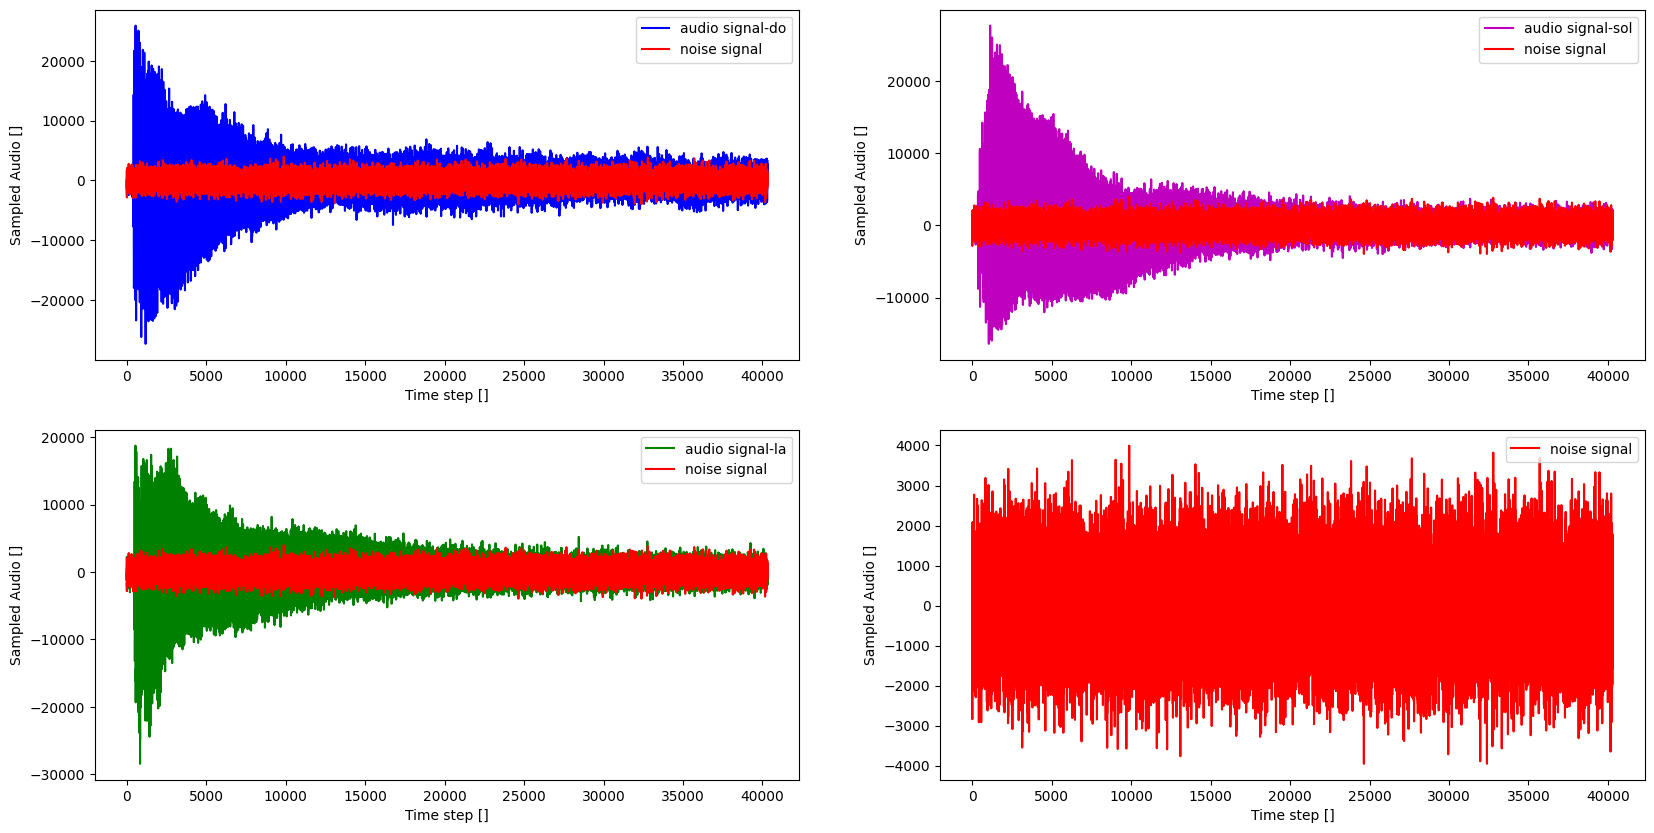

In [3]:
fig = plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(time_steps,data_noised[0],'b', label='audio signal-do') 
plt.plot(time_steps,noise_measured,'r', label='noise signal') 
plt.legend(loc="upper right")
plt.ylabel('Sampled Audio []')
plt.xlabel('Time step []')

plt.subplot(2, 2, 2)
plt.plot(time_steps,data_noised[1],'m', label='audio signal-sol') 
plt.plot(time_steps,noise_measured,'r', label='noise signal') 
plt.legend(loc="upper right")
plt.ylabel('Sampled Audio []')
plt.xlabel('Time step []')

plt.subplot(2, 2, 3)
plt.plot(time_steps,data_noised[2],'g', label='audio signal-la') 
plt.plot(time_steps,noise_measured,'r', label='noise signal') 
plt.legend(loc="upper right")
plt.ylabel('Sampled Audio []')
plt.xlabel('Time step []')

plt.subplot(2, 2, 4)
plt.plot(time_steps,noise_measured,'r', label='noise signal') 
plt.legend(loc="upper right")
plt.ylabel('Sampled Audio []')
plt.xlabel('Time step []')

plt.show()


**3. (15 points)** Determine the Wiener-Hopf equation for the denoising case with filter order $m$.
What assumptions are we making for the audio signal and the noise in order to obtain the values of the filter $w$?
Derive how can we calculate the right hand side of the Wiener-Hopf equation assuming that we know $r_x(k), \; \forall k$ 
and the noise variance $\sigma^2_v$.

> The assumptions we need to make for the audio signals in order to obtain the filter $w$ are the following:
- The noise signal has properties of zero mean WSS signals (i.e. it is zero mean WSS)
- The three signals of interest $d(n)$ are uncorrelated to the noise signal $v(n)$

The Wiener-Hopf equation is given by:
$$
\mathbf{R}_{\mathbf{x}} \hat{\mathbf{w}}=\mathbf{r}_{\mathbf{d x}}
$$
Which can be rewritten in matrix form according to the following functions: 
$$
\left[\begin{array}{cccc}
r_x(0) & r_x^*(1) & \cdots & r_x^*(m-1) \\
r_x(1) & r_x(0) & & r_x^*(m-2) \\
\vdots & & \ddots & \vdots \\
r_x(m-1) & \cdots & & r_x(0)
\end{array}\right]\left[\begin{array}{c}
\hat{w}(0) \\
\hat{w}(1) \\
\vdots \\
\hat{w}(m-1)
\end{array}\right]=\left[\begin{array}{c}
r_{d x}(0) \\
r_{d x}(1) \\
\vdots \\
r_{d x}(m-1)
\end{array}\right]
$$

The left and right hand side of the equations are then respectively found according to equations (9.16) and (9.17) of the reader by: 
$$
r_x(k)=E\left[x(n) x^*(n-k)\right] \quad r_{d x}(k)=E\left[d(n) x^*(n-k)\right]
$$
$$
\begin{aligned}
r_x(k) &=E\left[(d(n)+v(n))\left(d^*(n-k)+v^*(n-k)\right)\right] \\
&=r_d(k)+r_v(k) \text { and } \\
r_{d x}(k) &=E\left[d(n)\left(d^*(n-k)+v^*(n-k)\right)\right] \\
&=E\left[d(n)\left(\underbrace{d(n) d^*(n-k)}_{r_d}+ \underbrace{d(n)v^*(n-k)}_{=0}\right)\right] \\
&=r_d(k)
\end{aligned}
$$
Since according to the two assumptions made previously:
$$
E\left[d(n) v^*(n-k)\right]=0 \quad \forall k
$$
It then follows that the filter $w$ can be found by solving:
$$
\hat{\mathbf{w}}=\mathbf{R}_{\mathbf{x}}^{-1} \mathbf{r}_{\mathbf{d x}}
$$

**4. (10 points)** Using your background noise measurement, estimate its mean and variance ($\sigma^2_v$). Print these estimates.

Next, compute and plot the noise auto-correlation function of the measured noise for lags $0..9$. Is the signal ZMWN? Explain your answer.

**Note:** if the signal $x(n)$ is auto-correlation ergodic,
the auto-correlation function $r_x(k)$ can be estimated as
(if we have only values $x_1, x_2, \dots, x_N$):
$$
    r_x(k) = \frac{1}{N-k} \sum_{i=k+1}^{N} x(i) x^*(i-k)
$$

**Note:** if you are unfamiliar with python, take care when copying `np.arrays`. Read more [here](https://numpy.org/doc/stable/reference/generated/numpy.copy.html).

Mean: μ= 5.4170357109901355
Varaince: σ²= 1001140.3556802921
lag n=0 : rᵥ(0)=1001094.6525815588
lag n=1 : rᵥ(1)=5877.588301423162
lag n=2 : rᵥ(2)=3263.366051757975
lag n=3 : rᵥ(3)=-5651.721435914083
lag n=4 : rᵥ(4)=-310.07213608729023
lag n=5 : rᵥ(5)=8271.815142552136
lag n=6 : rᵥ(6)=-7208.166681377407
lag n=7 : rᵥ(7)=2778.778687921224
lag n=8 : rᵥ(8)=-85.5703745779555
lag n=9 : rᵥ(9)=-4023.1864590848827
lag n=10 : rᵥ(10)=-2051.8290583501475


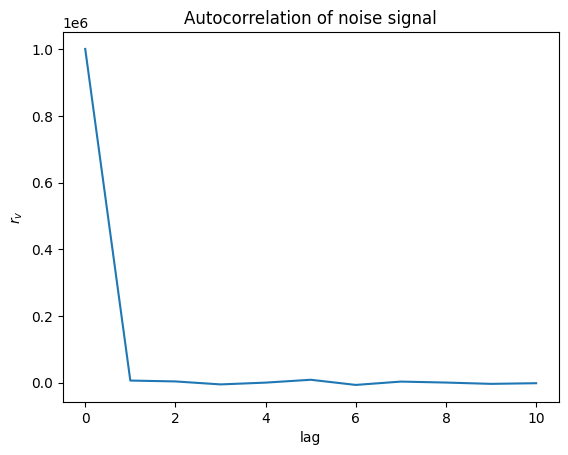

In [4]:
#Mean & Variance of noise
mean_noise = np.mean(noise_measured)
variance_noise = np.var(noise_measured)
print('Mean: \u03BC= {}\nVaraince: \u03C3\u00b2= {}'.format(mean_noise, variance_noise))

#Autocorrelation
lag = 10
r_v = []

for k in range(0,lag+1):
    r = 0
    for j in range(np.abs(k)+1,N):
        r += noise_measured[j] * noise_measured[j - np.abs(k)]
    r_v.append( (1/(N - abs(k))) * r )
    print('lag n={} : r\N{LATIN SUBSCRIPT SMALL LETTER v}({})={}'.format(k,k,r_v[k]))

r_v_plot = plt.plot(r_v)
plt.title('Autocorrelation of noise signal')
plt.ylabel('$r_v$')
plt.xlabel('lag')
plt.show(r_v_plot)


> Enter answer here.
When calculating the mean of the noise signal it is equal to 5, which given the range of the noise (+- 4000) is very close to zero, the condition for ZMWN. Thus, we assumed the noise to be ZMWN.

**5. (10 points)** Assuming the ergodicity property of the  audio signals, calculate the auto-correlation function $r_x(k)$ of every received audio signal for lags $0,\dots,9$. Print these values.

Next, calculate the cross-correlation function $r_{dx}(k)$ of every received audio signal for lags $0,\dots,9$. Print these values.

In [5]:
#Autocorrelation for the audio signals
r_x1 = []
r_x2 = []
r_x3 = []
print('Autocorrelations for audio signals')
for k in range(0,lag+1):
    r1 = 0 
    r2 = 0
    r3 = 0
    for j in range(np.abs(k)+1,N):
        r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
        r2 += data_noised[1,j] * data_noised[1,j - np.abs(k)]
        r3 += data_noised[2,j] * data_noised[2,j - np.abs(k)]
    r_x1.append( (1/(N - abs(k))) * r1 )
    r_x2.append( (1/(N - abs(k))) * r2 )
    r_x3.append( (1/(N - abs(k))) * r3 )
    print('lag n={} : r1\N{LATIN SUBSCRIPT SMALL LETTER x}({})={}, r2\N{LATIN SUBSCRIPT SMALL LETTER x}({})={}, r3\N{LATIN SUBSCRIPT SMALL LETTER x}({})={}'.format(k,k,round(r_x1[k]),k,round(r_x2[k]),k,round(r_x3[k])))

#Cross-correlation of every received audio signal
r_dx1 = np.subtract(r_x1,r_v)
r_dx2 = np.subtract(r_x2,r_v)
r_dx3 = np.subtract(r_x3,r_v)

# print('Cross-correlations for audio signals')
# for k in range(0,lag+1):
#     r1v = 0 
#     r2v = 0
#     r3v = 0
#     for j in range(np.abs(k)+1,N):
#         r1v += (data_noised[0]-noise_measured)[j] * noise_measured[j - np.abs(k)]
#         r2v += (data_noised[1]-noise_measured)[j] * noise_measured[j - np.abs(k)]
#         r3v += (data_noised[2]-noise_measured)[j] * noise_measured[j - np.abs(k)]
#     r_x1v.append( (1/(N - abs(k))) * r1v )
#     r_x2v.append( (1/(N - abs(k))) * r2v )
#     r_x3v.append( (1/(N - abs(k))) * r3v )
#     print('lag n={} : r1\N{LATIN SUBSCRIPT SMALL LETTER v}({})={}, r2\N{LATIN SUBSCRIPT SMALL LETTER v}({})={}, r3\N{LATIN SUBSCRIPT SMALL LETTER v}({})={}'.format(k,k,round(r_x1v[k]),k,round(r_x2v[k]),k,round(r_x3v[k])))


Autocorrelations for audio signals
lag n=0 : r1ₓ(0)=14718283, r2ₓ(0)=13388393, r3ₓ(0)=9453354
lag n=1 : r1ₓ(1)=13432839, r2ₓ(1)=12248910, r3ₓ(1)=8214526
lag n=2 : r1ₓ(2)=12574242, r2ₓ(2)=11843411, r3ₓ(2)=7553882
lag n=3 : r1ₓ(3)=11303923, r2ₓ(3)=11210025, r3ₓ(3)=6598931
lag n=4 : r1ₓ(4)=9723721, r2ₓ(4)=10410337, r3ₓ(4)=5463944
lag n=5 : r1ₓ(5)=7964478, r2ₓ(5)=9448087, r3ₓ(5)=4224847
lag n=6 : r1ₓ(6)=6145695, r2ₓ(6)=8383850, r3ₓ(6)=3012178
lag n=7 : r1ₓ(7)=4332462, r2ₓ(7)=7201536, r3ₓ(7)=1845536
lag n=8 : r1ₓ(8)=2550031, r2ₓ(8)=5947316, r3ₓ(8)=757725
lag n=9 : r1ₓ(9)=909974, r2ₓ(9)=4628339, r3ₓ(9)=-217473
lag n=10 : r1ₓ(10)=-615777, r2ₓ(10)=3305088, r3ₓ(10)=-1104803


**6. (10 points)** Using a 10-th order FIR Wiener filter, calculate the optimal filter coefficients for every received audio signal. Print these values.

**Note:** The `sp.linalg.toeplitz()` function may be useful.

In [6]:
Rm1 = lin.toeplitz(r_x1)
Rm2 = lin.toeplitz(r_x2)
Rm3 = lin.toeplitz(r_x3)
w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)
w_2 = np.matmul(np.linalg.inv(Rm2), r_dx2)
w_3 = np.matmul(np.linalg.inv(Rm3), r_dx3)

print(w_1)
print(w_2)
print(w_3)


[ 0.52922146  0.33224218  0.14544716  0.03942738 -0.02682155 -0.0500598
 -0.01675225 -0.00802825 -0.0104504   0.00451853 -0.0165777 ]
[ 0.42785944  0.30158639  0.1834938   0.0951144   0.03653596 -0.00850173
  0.0025964  -0.01995017 -0.02354959 -0.0364545  -0.0435468 ]
[ 0.51247424  0.31812129  0.14411648  0.03934158 -0.01888033 -0.05041655
 -0.01506166 -0.00995687 -0.00180016  0.00271876 -0.02539347]


**7. (15 points)** Using the computed filter coefficients, compute an estimate of the denoised audio signals from the received ones.

Plot together the denoised signal with the originally received one. Draw one plot for every audio signal.

Use the `play_signal()` function in order to play the denoised signals - do you hear the difference between the originally received and the denoised one? 

**Note:** the `sp.signal.lfilter()` function can be useful when using the Wiener filter.

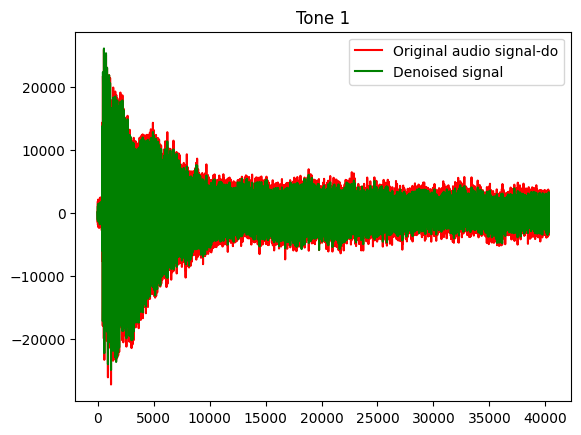

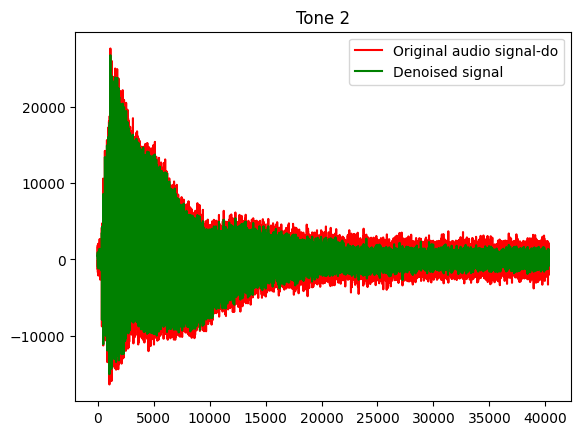

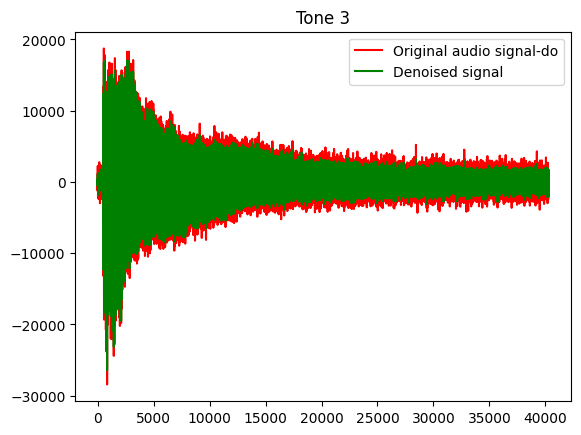

In [7]:
d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
e1 = (data_noised[0]-noise_measured) - d1_estimate

d2_estimate = sig.lfilter(w_2, 1, data_noised[1])
e2 = (data_noised[1]-noise_measured) - d2_estimate

d3_estimate = sig.lfilter(w_3, 1, data_noised[2])
e3 = (data_noised[2]-noise_measured) - d3_estimate

plot1 = plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
plot2 = plt.plot(time_steps,(d1_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Tone 1")
plt.show()

plot1 = plt.plot(time_steps,data_noised[1],'r', label='Original audio signal-do')
plot2 = plt.plot(time_steps,(d2_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Tone 2")
plt.show()

plot1 = plt.plot(time_steps,data_noised[2],'r', label='Original audio signal-do')
plot2 = plt.plot(time_steps,(d3_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Tone 3")
plt.show()

# plt.figure(figsize=(25, 10))
# plot1 = plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
# plot2 = plt.plot(time_steps,(e1 + d1_estimate),'g', label='Denoised signal') 

play_signal( e1 + d1_estimate)

> Enter answer here.
There seems to be a difference, but it is barely hearable. The noise was still very present, but the note sounded louder.

**8. (10 points)** You will now attempt to understand what the Wiener filter is doing. To that end we will use the periodogram on the noisy and filtered signals. Calculate $P_x$ and $P_{\hat{d}}$ for each recording. For each distance, create two side-by-side plots: the first subplot should show $P_x$ and $P_{\hat d}$ over the whole positive discrete frequency spectrum $[0, \pi]$ rad/sample, while the second subplot should show the exact same graph but zoomed in on the lower frequencies, e.g. $[0,0.8]$ rad/sample. The $y$-axis should be in decibels, i.e. $20 \log_{10} P$. What do you conclude?

**Note:** Plot first $P_x$ and then overlay on top $P_{\hat d}$. Also play with transparencies to achieve a readable plot. In order to avoid indexing mistakes, it's suggested to use the `np.fft.fftfreq` function.

          


Note 1 (do)


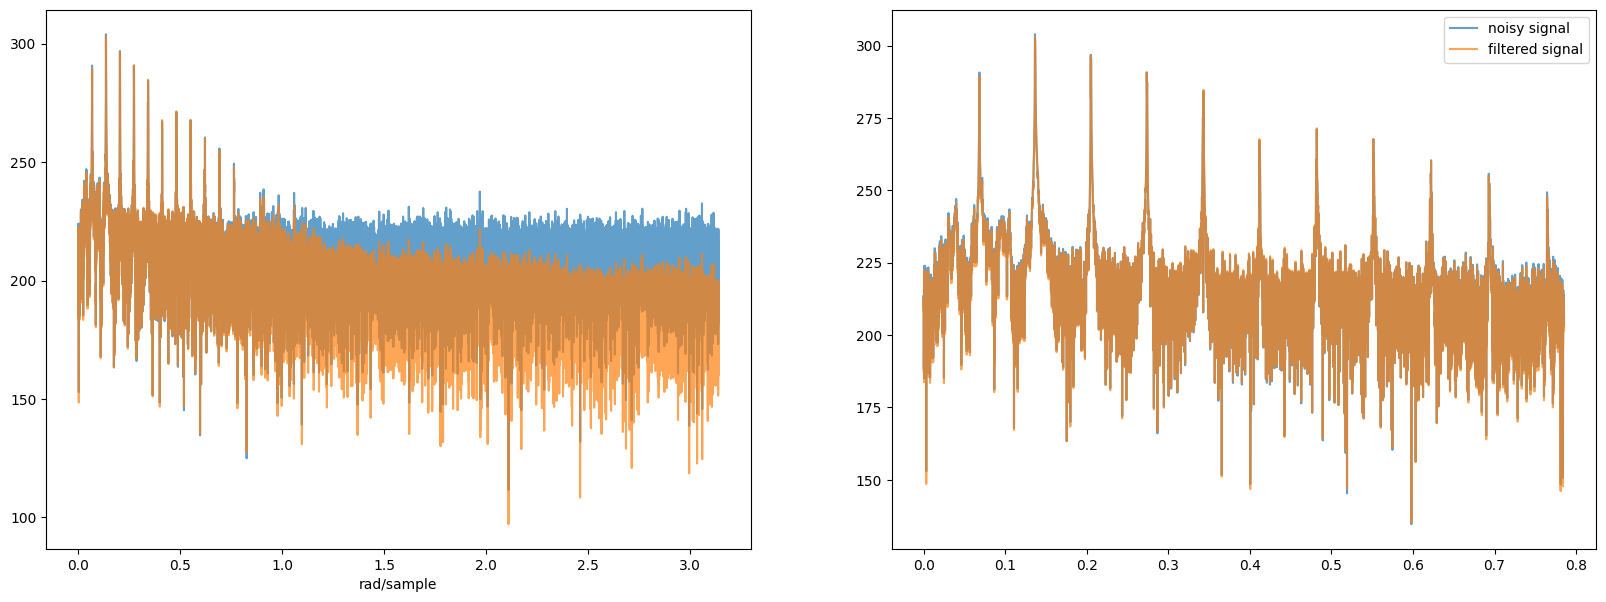

Note 2 ()


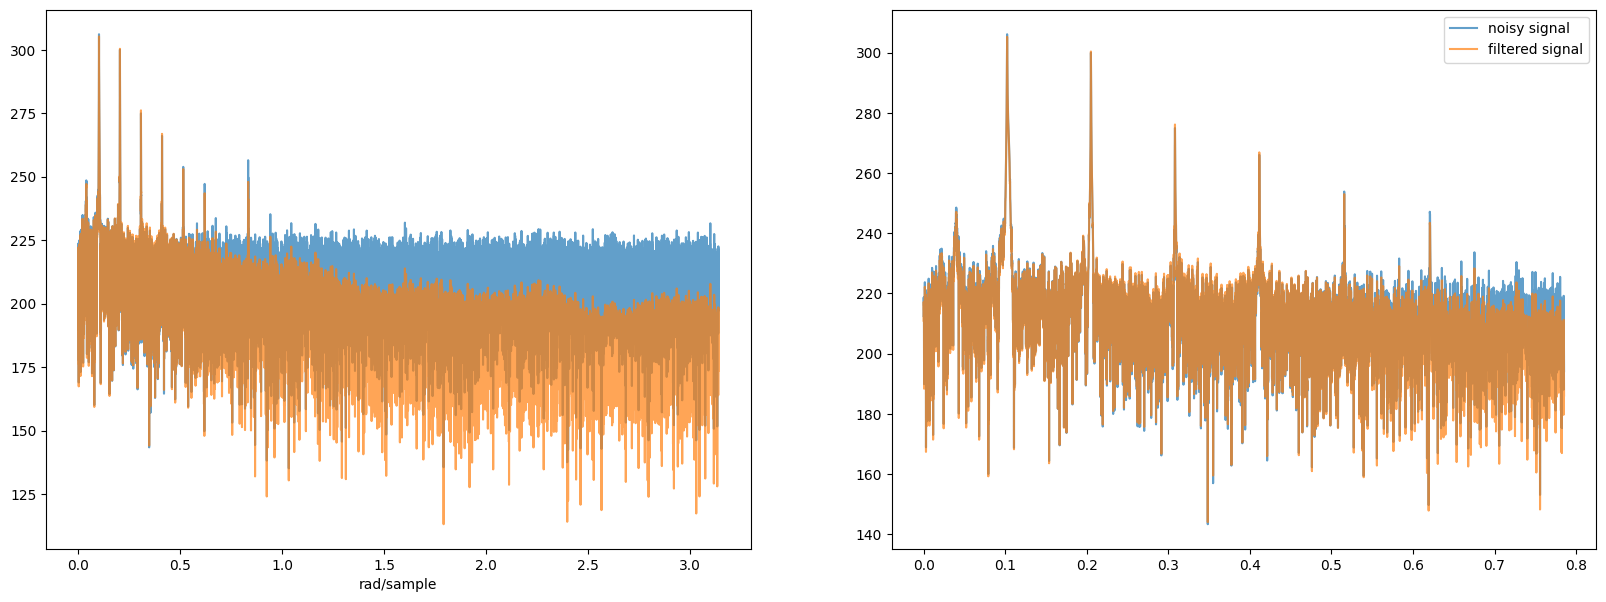

Note 3 ()


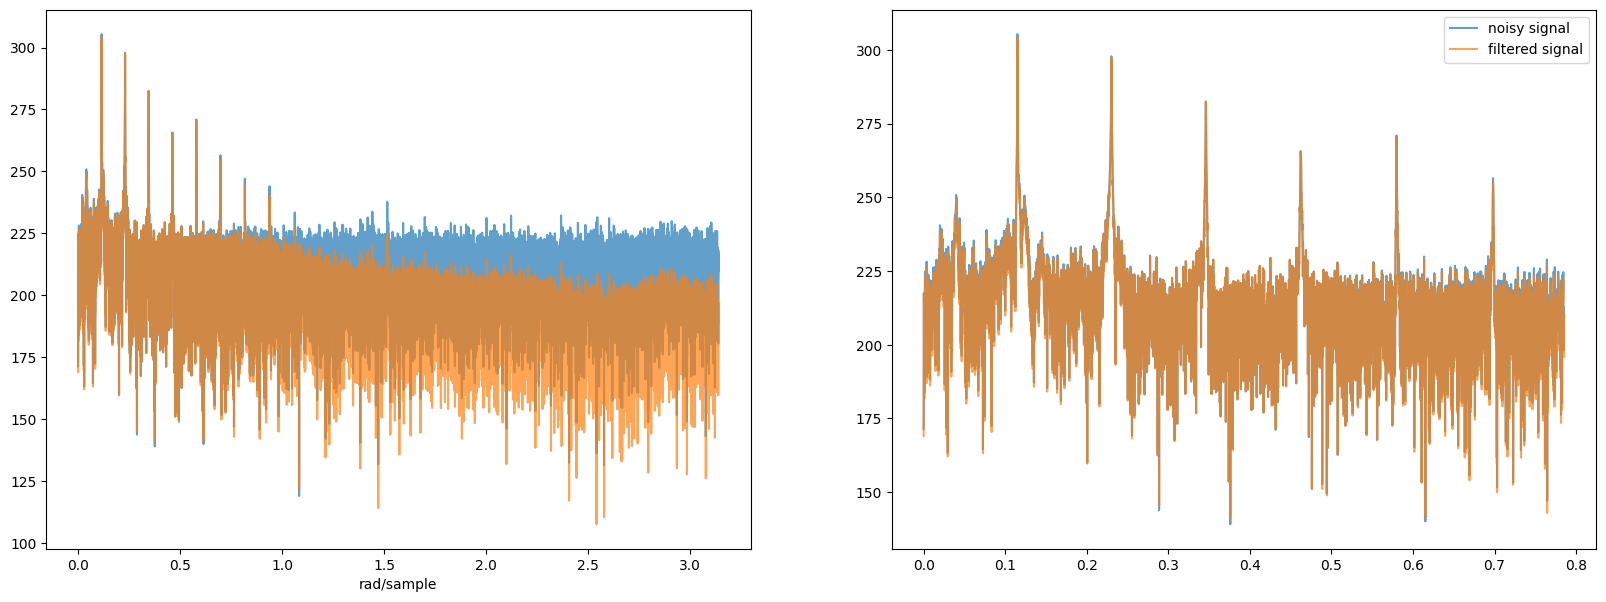

In [8]:
ts = 1/2/np.pi

print("Note 1 (do)")
plt.figure(figsize=(20, 7))

px1 = np.abs(np.fft.fft(data_noised[0])**2)
px1_r = np.abs(np.fft.fft(d1_estimate)**2)
frequency_x1 = np.fft.fftfreq(len(data_noised[0]), ts)
idx = np.argsort(frequency_x1)
plt.subplot(1,2,1)
plt.xlabel("rad/sample")
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1[idx][len(px1)//2:]]), label="noisy signal", alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1_r[idx][len(px1)//2:]]), label="filtered signal", alpha=0.7)
plt.subplot(1,2,2)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1[idx][len(px1)//2:5*len(px1)//8]]), label="noisy signal",alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1_r[idx][len(px1)//2:5*len(px1)//8]]), label="filtered signal",alpha=0.7)
plt.legend()
plt.show()



print("Note 2 ()")
plt.figure(figsize=(20, 7))

px1 = np.abs(np.fft.fft(data_noised[1])**2)
px1_r = np.abs(np.fft.fft(d2_estimate)**2)

frequency_x1 = np.fft.fftfreq(len(data_noised[1]), ts)
idx = np.argsort(frequency_x1)
plt.subplot(1,2,1)
plt.xlabel("rad/sample")
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1[idx][len(px1)//2:]]), label="noisy signal", alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1_r[idx][len(px1)//2:]]), label="filtered signal", alpha=0.7)
plt.subplot(1,2,2)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1[idx][len(px1)//2:5*len(px1)//8]]), label="noisy signal", alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1_r[idx][len(px1)//2:5*len(px1)//8]]), label="filtered signal", alpha=0.7)
plt.legend()

plt.show()




print("Note 3 ()")
plt.figure(figsize=(20, 7))

px1 = np.abs(np.fft.fft(data_noised[2])**2)
px1_r = np.abs(np.fft.fft(d3_estimate)**2)

frequency_x1 = np.fft.fftfreq(len(data_noised[2]), ts)
idx = np.argsort(frequency_x1)
plt.subplot(1,2,1)
plt.xlabel("rad/sample")
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1[idx][len(px1)//2:]]), label="noisy signal", alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:], 20 * np.log10([np.abs(f) for f in px1_r[idx][len(px1)//2:]]), label="filtered signal", alpha=0.7)
plt.subplot(1,2,2)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1[idx][len(px1)//2:5*len(px1)//8]]), label="noisy signal", alpha=0.7)
plt.plot(frequency_x1[idx][len(px1)//2:5*len(px1)//8], 20 * np.log10([np.absolute(f) for f in px1_r[idx][len(px1)//2:5*len(px1)//8]]), label="filtered signal", alpha=0.7)
plt.legend()

plt.show()


> Enter answer here.
The filter seems to to filter particularly well the high frequency noise. For the lower frequencies, as visible in the right hand plots, the filter does not improve the signal/noise ratio much.

**9. (15 points)** Now that you've heard the filtered audio, you may naturally be unimpressed with the results. Determined to improve the results you obtained, you decide investigate the effect of the filter order on the estimate of the audio bitstream. To do so, you vary the filter order between $m= 2$ and $m= 500$. 
To focus your experiments, you choose only a single piano key and focus on that audio file.

What filter order would you choose in order to filter the audio signal? Around what number does an increase in filter order no longer yield a significant improvement?

To justify your answer, you may want to look at the value of the cost function $ J(w(i)) = E [|e(n;w(i))|^2] $

Plot the denoised signal with the filter order of your choice along with the originally received one. Play the new audio. Do you notice any improvements over the original audio or the signal obtained with the 10th order filter?


<Figure size 640x480 with 0 Axes>

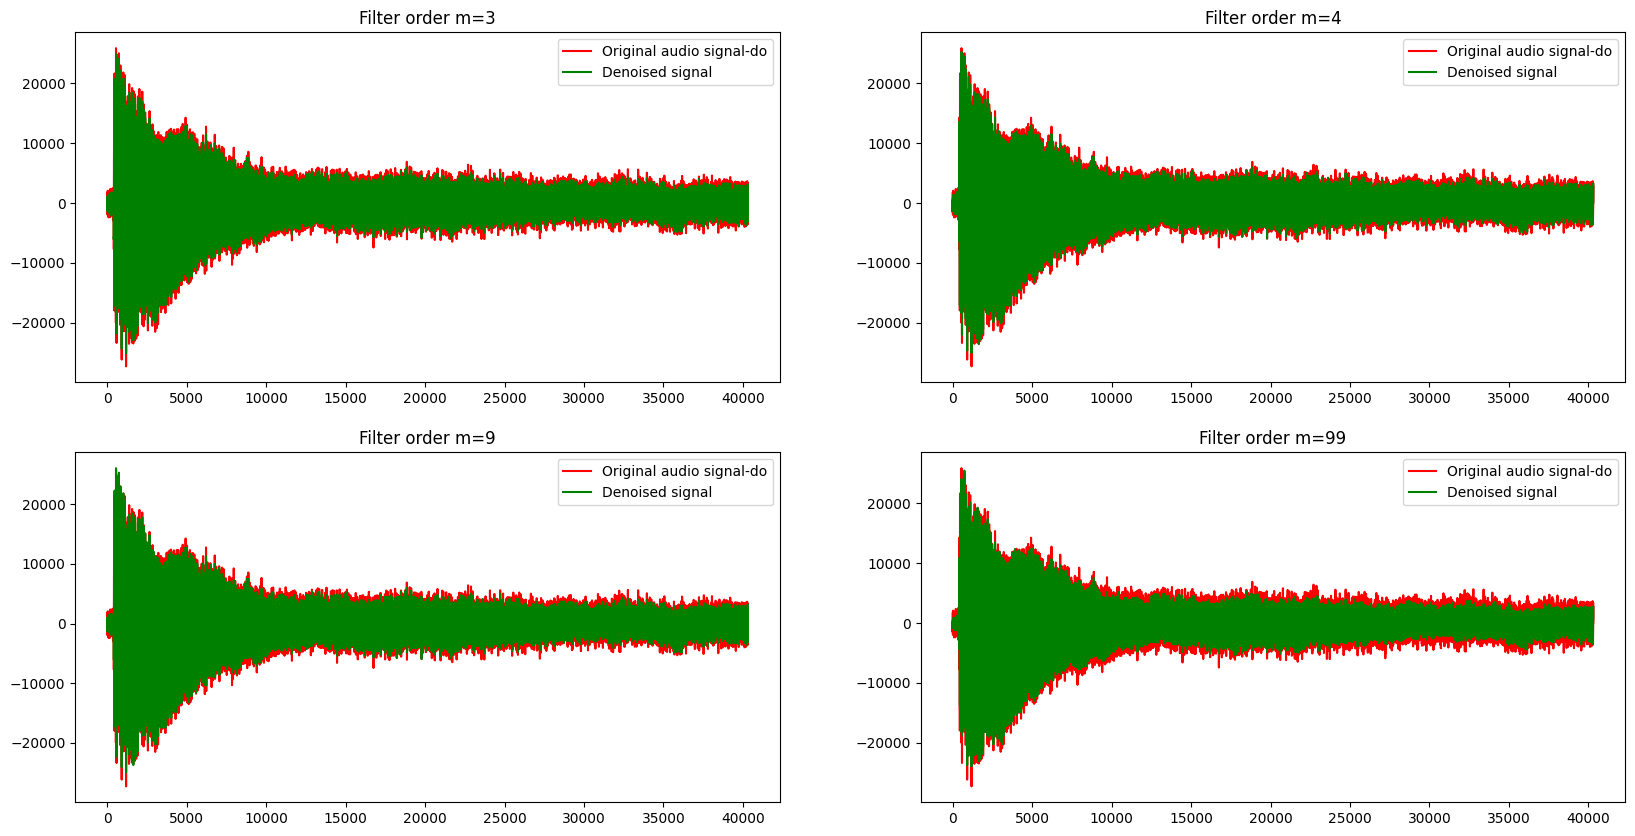

In [19]:
#The following code is commented out due to its high computational cost, but can be used to run on a powerful machine to compute the cost J for high filter orders (up to 500)
# J1 = []

# for m in range(2,50):
#     lag = m
#     r_v = []

#     for k in range(0,lag+1):
#         r = 0
#         for j in range(np.abs(k)+1,N):
#             r += noise_measured[j] * noise_measured[j - np.abs(k)]
#         r_v.append( (1/(N - abs(k))) * r )

#     r_x1 = []
    
#     for k in range(0,lag+1):
#         r1 = 0 
#         for j in range(np.abs(k)+1,N):
#             r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
#         r_x1.append( (1/(N - abs(k))) * r1 )
        
#     r_dx1 = np.subtract(r_x1,r_v)
#     Rm1 = lin.toeplitz(r_x1)
    
#     J1.append( r_dx1[0] - np.matrix.getH(r_dx1) @ np.linalg.inv(Rm1) @ r_dx1) 

# plt.plot(J1)


# e = []

# for m in range(2,50):
#     print("its working", m)
#     lag = m
#     r_v = []
#     print("next: first loop")
#     for k in range(0,lag+1):
#         r = 0
#         for j in range(np.abs(k)+1,N):
#             r += noise_measured[j] * noise_measured[j - np.abs(k)]
#         r_v.append( (1/(N - abs(k))) * r )

#     r_x1 = []
#     print("next: second loop")
#     for k in range(0,lag+1):
#         r1 = 0 
#         for j in range(np.abs(k)+1,N):
#             r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
#         r_x1.append( (1/(N - abs(k))) * r1 )
#     r_dx1 = np.subtract(r_x1,r_v)
    
#     print("next: toeplitz")
#     Rm1 = lin.toeplitz(r_x1)
#     print("next: w1")
#     w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)
#     print("next: d1_estimate")
#     d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
#     print("next: error summation")
#     e.append(sum(((data_noised[0]-noise_measured) - d1_estimate)**2))


# plt.plot(e)
# plt.show()
lag = 3
r_v = []

for k in range(0,lag+1):
    r = 0
    for j in range(np.abs(k)+1,N):
        r += noise_measured[j] * noise_measured[j - np.abs(k)]
    r_v.append( (1/(N - abs(k))) * r )

r_x1 = []
    
for k in range(0,lag+1):
    r1 = 0 
    for j in range(np.abs(k)+1,N):
        r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
    r_x1.append( (1/(N - abs(k))) * r1 )
        
r_dx1 = np.subtract(r_x1,r_v)
Rm1 = lin.toeplitz(r_x1)
w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)

d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
e1 = (data_noised[0]-noise_measured) - d1_estimate

fig = plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
plt.plot(time_steps,(d1_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Filter order m=3")


lag = 4
r_v = []

for k in range(0,lag+1):
    r = 0
    for j in range(np.abs(k)+1,N):
        r += noise_measured[j] * noise_measured[j - np.abs(k)]
    r_v.append( (1/(N - abs(k))) * r )

r_x1 = []
    
for k in range(0,lag+1):
    r1 = 0 
    for j in range(np.abs(k)+1,N):
        r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
    r_x1.append( (1/(N - abs(k))) * r1 )
        
r_dx1 = np.subtract(r_x1,r_v)
Rm1 = lin.toeplitz(r_x1)
w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)

d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
e1 = (data_noised[0]-noise_measured) - d1_estimate

plt.subplot(2, 2, 2)
plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
plt.plot(time_steps,(d1_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Filter order m=4")


lag = 10
r_v = []

for k in range(0,lag+1):
    r = 0
    for j in range(np.abs(k)+1,N):
        r += noise_measured[j] * noise_measured[j - np.abs(k)]
    r_v.append( (1/(N - abs(k))) * r )

r_x1 = []
    
for k in range(0,lag+1):
    r1 = 0 
    for j in range(np.abs(k)+1,N):
        r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
    r_x1.append( (1/(N - abs(k))) * r1 )
        
r_dx1 = np.subtract(r_x1,r_v)
Rm1 = lin.toeplitz(r_x1)
w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)

d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
e1 = (data_noised[0]-noise_measured) - d1_estimate

plt.subplot(2, 2, 3)
plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
plt.plot(time_steps,(d1_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Filter order m=9")


lag = 99
r_v = []

for k in range(0,lag+1):
    r = 0
    for j in range(np.abs(k)+1,N):
        r += noise_measured[j] * noise_measured[j - np.abs(k)]
    r_v.append( (1/(N - abs(k))) * r )

r_x1 = []
    
for k in range(0,lag+1):
    r1 = 0 
    for j in range(np.abs(k)+1,N):
        r1 += data_noised[0,j] * data_noised[0,j - np.abs(k)]
    r_x1.append( (1/(N - abs(k))) * r1 )
        
r_dx1 = np.subtract(r_x1,r_v)
Rm1 = lin.toeplitz(r_x1)
w_1 = np.matmul(np.linalg.inv(Rm1), r_dx1)
d1_estimate = sig.lfilter(w_1, 1, data_noised[0])
e1 = (data_noised[0]-noise_measured) - d1_estimate

plt.subplot(2, 2, 4)
plt.plot(time_steps,data_noised[0],'r', label='Original audio signal-do')
plt.plot(time_steps,(d1_estimate),'g', label='Denoised signal') 
plt.legend()
plt.title("Filter order m=99")
plt.show()

We hypothesized that at a certain point increasing the filter order will no longer yield a significant improvement in the quality of the denoised signal. Therefore, the the cost function $J(w(i))$ was computed and plotted for filter orders $m=[2,500]$ on a machine with 32GB of ram and a 16 core 11th gen i9 Intel CPU. The computation time was roughly 2.5h hours, showing that indeed this computation is too costly and infeasible. The results of the cost function $J(w(i))$ is plotted againgst filter order $m$ in the figure below. It can be seen that the cost function $J(w(i))$ drastically improves for order numbers around m=4 and m=95. This can be partially be varified by the 4 plots above, where a clear visual improvement is seen for m=99. Audible, once again it's difficult to objectivly notice an improvement in sound quality of the denoised signal. 

![alt text][cost]

[cost]: ./Figure_1.png